<a href="https://colab.research.google.com/github/giorginolab/Markov-Tutorial-UniMi-2021/blob/main/DeepTime_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial on Markov Models 

Toni Giorgino - toni.giorgino@cnr.it

This notebook provides an overview on how to use the DeepTime library to estimate Markov Models.

Useful links:

* DeepTime documentation: https://deeptime-ml.github.io
* Repository: https://github.com/deeptime-ml/deeptime
* Paper: Hoffmann M, Scherer M, Hempel T, Mardt A, Silva B de, Husic BE, et al. Deeptime: a Python library for machine learning dynamical models from time series data. Mach Learn: Sci Technol. 2021 Dec;3(1):015009. [10.1088/2632-2153/ac3de0](https://iopscience.iop.org/article/10.1088/2632-2153/ac3de0)

## Transition counting

For a very simple introduction on the counting functions of  the library, see https://deeptime-ml.github.io/latest/notebooks/transition-counting.html .




In [ ]:
!pip install deeptime

In [ ]:
import numpy as np
import deeptime
from deeptime.markov import TransitionCountEstimator
import matplotlib.pyplot as plt
import networkx as nx

count_estimator = TransitionCountEstimator(
    lagtime=1,
    count_mode="sliding"
)

In [ ]:
trajectory = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1, 7])

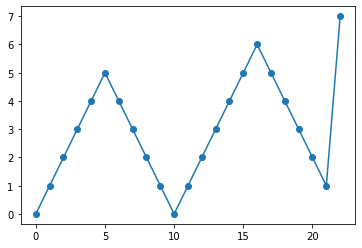

In [ ]:
plt.plot(trajectory,"o-")

In [ ]:
counts = count_estimator.fit(trajectory).fetch_model()  # fit and fetch the model

In [ ]:
counts.count_matrix

array([[0., 2., 0., 0., 0., 0., 0., 0.],
       [1., 0., 2., 0., 0., 0., 0., 1.],
       [0., 2., 0., 2., 0., 0., 0., 0.],
       [0., 0., 2., 0., 2., 0., 0., 0.],
       [0., 0., 0., 2., 0., 2., 0., 0.],
       [0., 0., 0., 0., 2., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
counts.state_histogram

array([2, 4, 4, 4, 4, 3, 1, 1])

<BarContainer object of 8 artists>

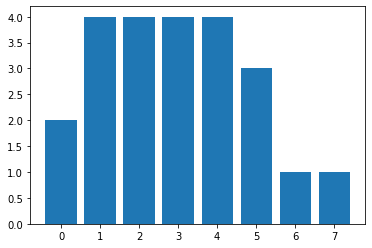

In [ ]:
plt.bar(np.arange(len(counts.state_histogram)),
        counts.state_histogram)

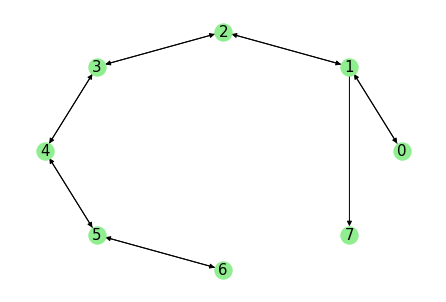

In [ ]:
G = nx.from_numpy_matrix(counts.count_matrix, create_using=nx.DiGraph())
pos = nx.circular_layout(G)
nx.draw_circular(G, node_color='#90EE90')
nx.draw_networkx_labels(G, pos, labels={i: i for i in G.nodes()}, font_size=15)
plt.show()


In [ ]:
import deeptime.markov as markov

msm_estimator = markov.msm.MaximumLikelihoodMSM(
    reversible=True,
    stationary_distribution_constraint=None
)

In [ ]:
msm = msm_estimator.fit(counts).fetch_model()

Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..


In [ ]:
msm

MarkovStateModelCollection-140559429158096:count_models=None,
                      reversible=True, stationary_distributions=None,
                      transition_matrices=None,
                      transition_matrix_tolerance=1e-06]

In [ ]:
msm.transition_matrix

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.33333334, 0.        , 0.66666666, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.50000001, 0.        , 0.49999999, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.50000001, 0.        , 0.49999999,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.50000001, 0.        ,
        0.49999999, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.66666667,
        0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ]])

In [ ]:
msm.stationary_distribution

array([0.05      , 0.15000001, 0.20000001, 0.2       , 0.19999999,
       0.14999999, 0.05      ])

<BarContainer object of 7 artists>

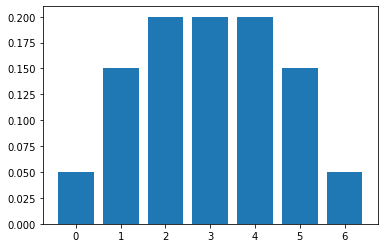

In [ ]:
plt.bar(np.arange(len(msm.stationary_distribution)),
        msm.stationary_distribution)